![https://raw.githubusercontent.com/marciolws/Curso_EBAC_Cientista_de_Dados/refs/heads/main/EBAC-media-utils/logo/ebac_logo-data_science.png](https://raw.githubusercontent.com/marciolws/Curso_EBAC_Cientista_de_Dados/refs/heads/main/EBAC-media-utils/logo/ebac_logo-data_science.png)

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 26** | Álgebra Linear | Exercício I

**Aluno:** [Marcio da Silva](https://www.linkedin.com/in/marciolws/)<br>
**Data:** 07 de outubro de 2024.


# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

In [20]:
#Importando as bibiliotecas a serem usadas.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
#Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [22]:
#Matriz de transformação.
m = np.array([[.5, .5], #Média.
             [-1, 1]]) #Diferença.

#Calculo da média e da diferença entre P1 e P2 através da multiplicação matricial.
df['media'], df['diferenca'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

(df.style #Definindo o estilo do dataframe.
   .format(precision=2, #Configurar a precisão para duas casas decimais.
           decimal=',')
    .bar(subset = 'diferenca', #Estilizando a coluna diferenca com cores diferenciando positivos e negativos.
         color=['pink', 'lightblue'],
         align='zero'))

,p1,p2,media,diferenca
0,"6,96","7,94","7,45","0,98"
1,"2,86","5,10","3,98","2,24"
2,"2,27","0,97","1,62","-1,29"
3,"5,51","4,47","4,99","-1,04"
4,"7,19","8,94","8,07","1,74"
5,"4,23","3,43","3,83","-0,80"
6,"9,81","9,84","9,82","0,03"
7,"6,85","7,92","7,38","1,07"
8,"4,81","5,70","5,25","0,89"
9,"3,92","5,68","4,80","1,75"


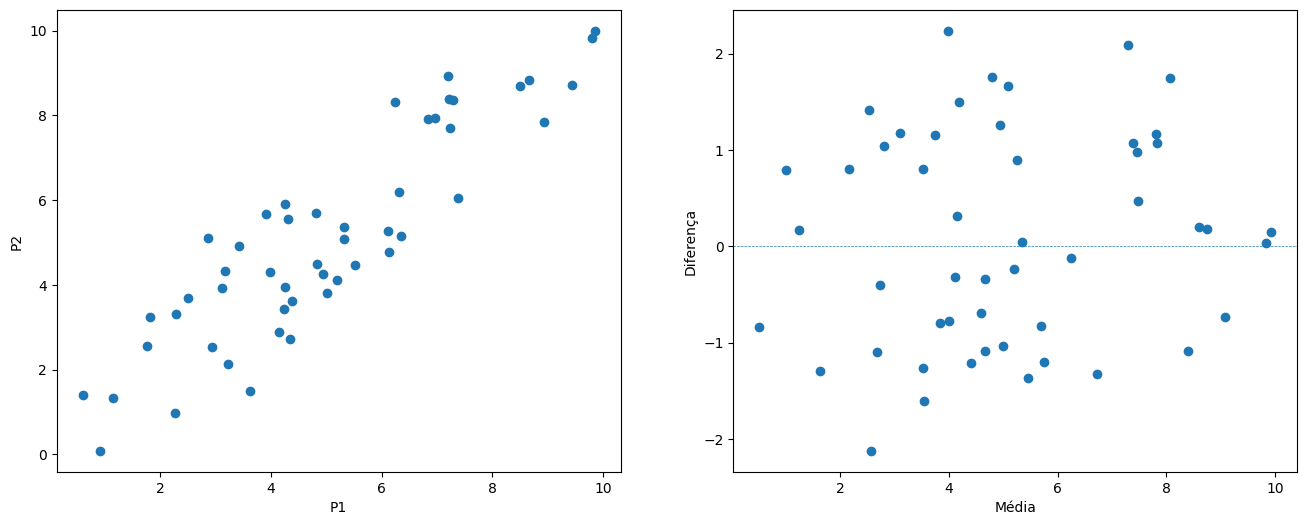

In [23]:
#Definindo a figura e os eixos.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

#Configurando graficos de valores P1 na horizontal e P2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2)
ax[0].set_xlabel('P1')
ax[0].set_ylabel('P2')

#Gráfico em relaçao a diferença de P1 X P2
scatter2 = ax[1].scatter(x=df['media'], y=df['diferenca'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--') 
ax[1].set_xlabel('Média')
ax[1].set_ylabel('Diferença')

plt.show()

b) Calcule a correlação entre os dados da **p1** e **p2**

In [19]:
print('A Correlaçao entre o P1 e P2 é de:', df.p1.corr(df.p2))

A Correlaçao entre o P1 e P2 e de: 0.8957365818728042


c) Calcule a correlação entre os dados transformados (média e diferença)

In [29]:
print('A Correlaçao entre a média e adiferença é de:', df['media'].corr(df['diferenca']))

A Correlaçao entre a média e adiferença é de: 0.13347385411788842


d) Comente as correlações observadas.

> Correlação entre os dados das variáveis `p1` e `p2`:   
> - A correlação existente de 0,89 demonstra de forma positiva entre as amostras das colunas `p1` e `p2`. Isso significa que essas variáveis têm uma relação positiva, indicando uma forte associação e semelhança entre os dois conjuntos de dados.

> Correlação entre os dados transformados (`média` e `diferença`):   
> - O valor obtido de -0,13 indica de forma negativa, relativamente baixa entre as variáveis transformadas. Isso significa que há uma relação inversa, ou seja, à medida que uma variável aumenta, a outra tende a diminuir, e vice-versa. No entanto, o valor próximo de zero (-0,13) indica uma correlação inversa fraca. Essa relação inversa pode não ser tão significativa ou previsível.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [36]:
df['soma'] = df.p1 + df.p2 

(df.style  
   .format(precision=2,  
           decimal=',')
   .bar(subset='diferenca',  
        color=['pink', 'lightblue'], 
        align='zero')
   .background_gradient(subset=['media', 'soma'])) 

,p1,p2,media,diferenca,soma
0,"6,96","7,94","7,45","0,98","14,91"
1,"2,86","5,10","3,98","2,24","7,96"
2,"2,27","0,97","1,62","-1,29","3,24"
3,"5,51","4,47","4,99","-1,04","9,99"
4,"7,19","8,94","8,07","1,74","16,13"
5,"4,23","3,43","3,83","-0,80","7,66"
6,"9,81","9,84","9,82","0,03","19,64"
7,"6,85","7,92","7,38","1,07","14,77"
8,"4,81","5,70","5,25","0,89","10,51"
9,"3,92","5,68","4,80","1,75","9,60"


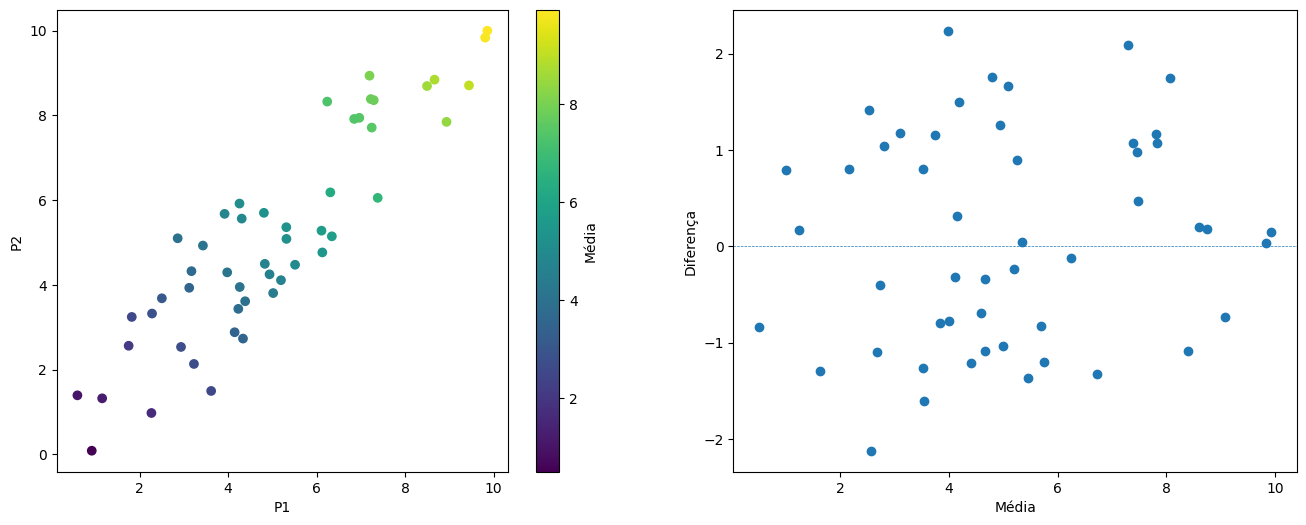

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

#Configurando graficos de valores P1 na horizontal e P2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['media'])
ax[0].set_xlabel('P1')
ax[0].set_ylabel('P2')

#Barra de cores que irá representar a média
cbar= fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média')

#Gráfico em relaçao a diferença de P1 X P2
scatter2 = ax[1].scatter(x=df['media'], y=df['diferenca'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--') 
ax[1].set_xlabel('Média')
ax[1].set_ylabel('Diferença')

plt.show()

> Analisando o gráfico 1, pude observar uma distribuição proporcional entre todos os valores de 0 a 10 entre a variável `p1` e `p2`. Isso significa que a distribuição dos pontos é equilibrada e não há concentração em uma faixa específica. Consequentemente, a média resultante também apresenta uma distribuição semelhante, refletindo as proporções das variáveis `p1` e `p2`.
> 
> Após a transformação dos dados para gerar a soma e a diferença, podemos perceber que a variação também é proporcional tanto no aumento quanto na diminuição dos valores de `p1` em relação a `p2` em todos os dados. Isso sugere que as operações de soma e diferença preservam a proporção entre os valores das variáveis, mantendo a relação entre elas.
> 
> Essas observações indicam que as relações entre `p1` e `p2`, tanto na distribuição original quanto nas operações de soma e diferença, possuem uma característica de proporcionalidade e mantêm as proporções entre os valores, o que pode ser importante para a análise e interpretação dos dados. Além disso, podemos concluir que a soma das duas variáveis nada mais é do que o dobro da média, e que a média, por sua vez, é a metade da soma das duas variáveis. Essa relação adicional entre a soma, a média e as variáveis `p1` e `p2` reforça ainda mais a importância da proporção na análise dos dados.